<a href="https://colab.research.google.com/github/Priyadharshini1604/22MIS1059_Priyadharshini-K/blob/main/Neural_netwokrs_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom
!pip install pandas
!pip install matplotlib
!pip install pandas matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import files


In [ ]:
customer_data = pd.read_csv('online_retail.csv')


In [ ]:
customer_data.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)
som_data = customer_data[['Quantity', 'UnitPrice']].values


In [ ]:
som = MiniSom(10, 10, 2, sigma=0.5, learning_rate=0.5)
som.random_weights_init(som_data)


In [ ]:
som.train_random(som_data, 1000)


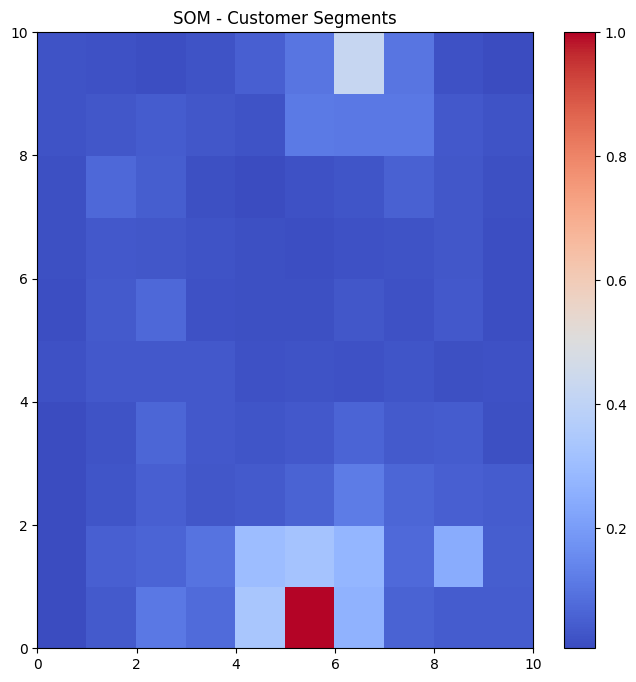

In [ ]:
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # Plot distance map
plt.colorbar()
plt.title('SOM - Customer Segments')
plt.show()


In [ ]:
winning_neurons = np.array([som.winner(x) for x in som_data])

customer_data['WinningNeuron'] = [str(x) for x in winning_neurons]
customer_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WinningNeuron
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,[0 6]
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,[7 6]
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,[7 8]
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,[7 6]
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,[7 6]


In [ ]:
customer_data.dropna(subset=['CustomerID'], inplace=True)
customer_data = customer_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

In [ ]:
scaler = MinMaxScaler()
customer_data[['Quantity', 'UnitPrice']] = scaler.fit_transform(customer_data[['Quantity', 'UnitPrice']])

In [ ]:
print(customer_data.head())

   CustomerID  Quantity  UnitPrice
0     12346.0  0.001538   0.000129
1     12347.0  0.014014   0.000328
2     12348.0  0.013420   0.000716
3     12349.0  0.004741   0.001029
4     12350.0  0.002538   0.000477


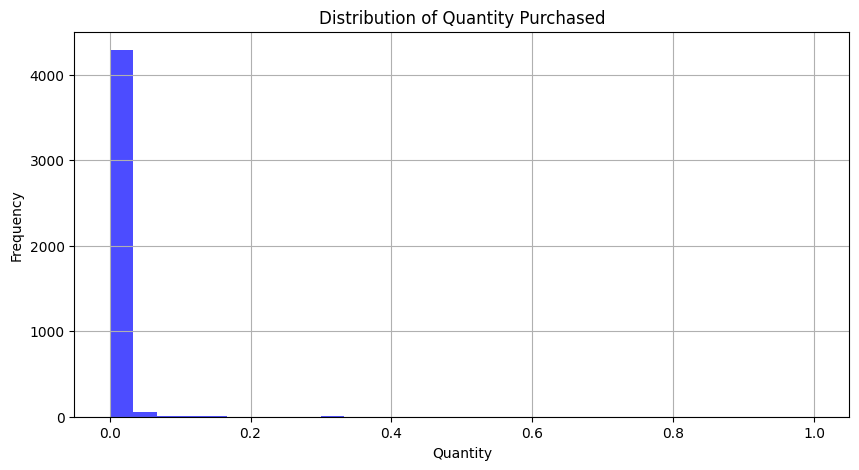

In [ ]:
#visualization
plt.figure(figsize=(10, 5))
plt.hist(customer_data['Quantity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid()
plt.show()

<ipython-input-20-6cb0347e91f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='UnitPrice', data=customer_data.sort_values('UnitPrice', ascending=False).head(10), palette='viridis')


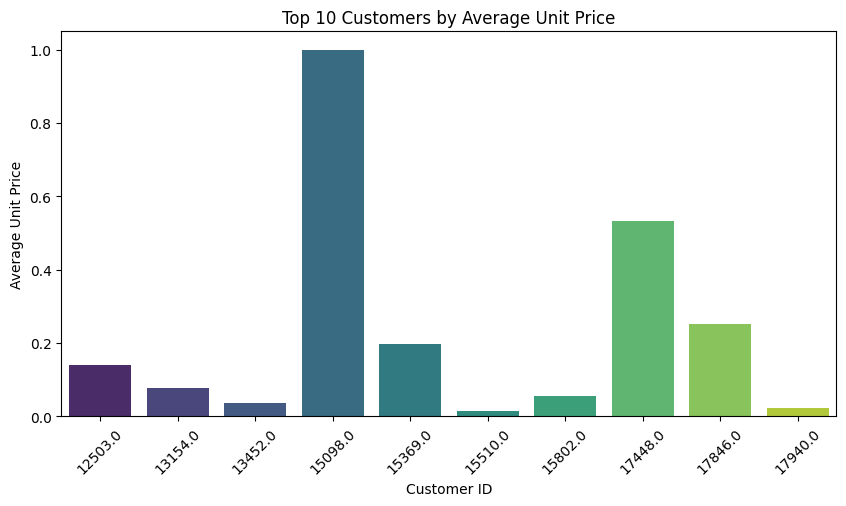

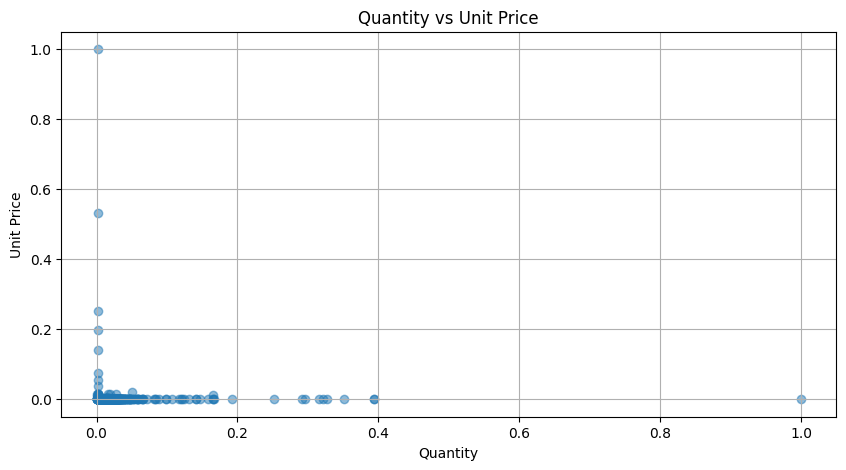

In [ ]:
#Visualization -barchart for avg unitprice per cust.
plt.figure(figsize=(10, 5))
sns.barplot(x='CustomerID', y='UnitPrice', data=customer_data.sort_values('UnitPrice', ascending=False).head(10), palette='viridis')
plt.title('Top 10 Customers by Average Unit Price')
plt.xlabel('Customer ID')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(customer_data['Quantity'], customer_data['UnitPrice'], alpha=0.5)
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.grid()
plt.show()

In [ ]:
customer_data.to_csv('Customer_Segmentation_Results.csv', index=False)
files.download('Customer_Segmentation_Results.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>